In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Упражнение 1

In [4]:
def f(pi, k):
    return sp.cos(pi*k/2)

k = np.arange(1, 11)

sym   = [f(sp.pi, _k) for _k in k]
const = [f(np.pi, _k) for _k in k]

print(f"Символьный: {sym}\n")
print(f"Системная константа: {const}\n")
print(f"Равенство: {sym == const}")

Символьный: [0, -1, 0, 1, 0, -1, 0, 1, 0, -1]

Системная константа: [6.12323399573677e-17, -1.00000000000000, -1.83697019872103e-16, 1.00000000000000, 3.06161699786838e-16, -1.00000000000000, -4.28626379701574e-16, 1.00000000000000, 5.51091059616309e-16, -1.00000000000000]

Равенство: False


### Упражнение 3

In [15]:
from sympy.abc import x, y
v = (x**7 + 3*x**2 - 4) / (x - 1)
v2 = sp.factor(v)

sp.pprint(v)
print(f"\nПосле разложения: {v2}")
print(f"\nПосле упрощения: {sp.simplify(v2)}")
print(f"\nОбратное: {sp.simplify(v).expand()}")
print(f"Упрощение невозможно")

 7      2    
x  + 3⋅x  - 4
─────────────
    x - 1    

После разложения: x**6 + x**5 + x**4 + x**3 + x**2 + 4*x + 4

После упрощения: x**6 + x**5 + x**4 + x**3 + x**2 + 4*x + 4

Обратное: x**7/(x - 1) + 3*x**2/(x - 1) - 4/(x - 1)
Упрощение невозможно


### Упражнение 4

#### a)

In [6]:
v = x**4 + 4
print(sp.factor(v))

(x**2 - 2*x + 2)*(x**2 + 2*x + 2)


#### б)

In [7]:
v = x**7 + 1
print(sp.factor(v))

(x + 1)*(x**6 - x**5 + x**4 - x**3 + x**2 - x + 1)


#### в)

In [8]:
v = 2*x**3 + x**2*y - 5*x*y**2 + 2*y**3
print(sp.factor(v))

(x - y)*(x + 2*y)*(2*x - y)


### Упражнение 5

In [9]:
a = sp.solve_univariate_inequality(x**3 + 3*x > 3, x, relational=False)

sp.pprint(a)
sp.pprint(sp.N(a, 5))

⎛                      _________   ⎞
⎜        1            ╱ 3   √13    ⎟
⎜- ───────────── + 3 ╱  ─ + ─── , ∞⎟
⎜      _________   ╲╱   2    2     ⎟
⎜     ╱ 3   √13                    ⎟
⎜  3 ╱  ─ + ───                    ⎟
⎝  ╲╱   2    2                     ⎠
(0.81773, ∞)


### Упражнение 6

a)


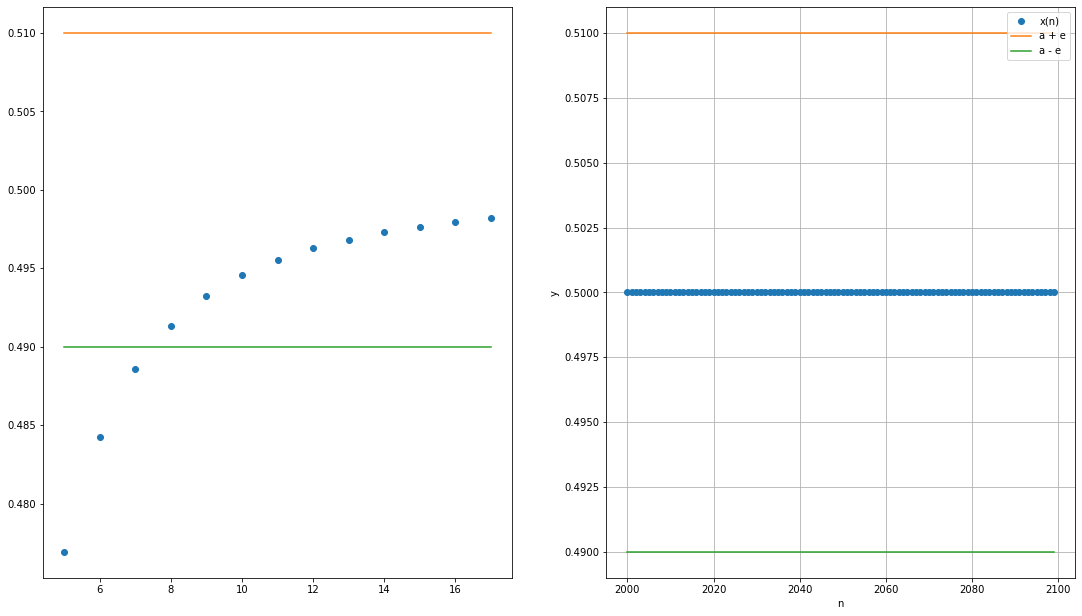

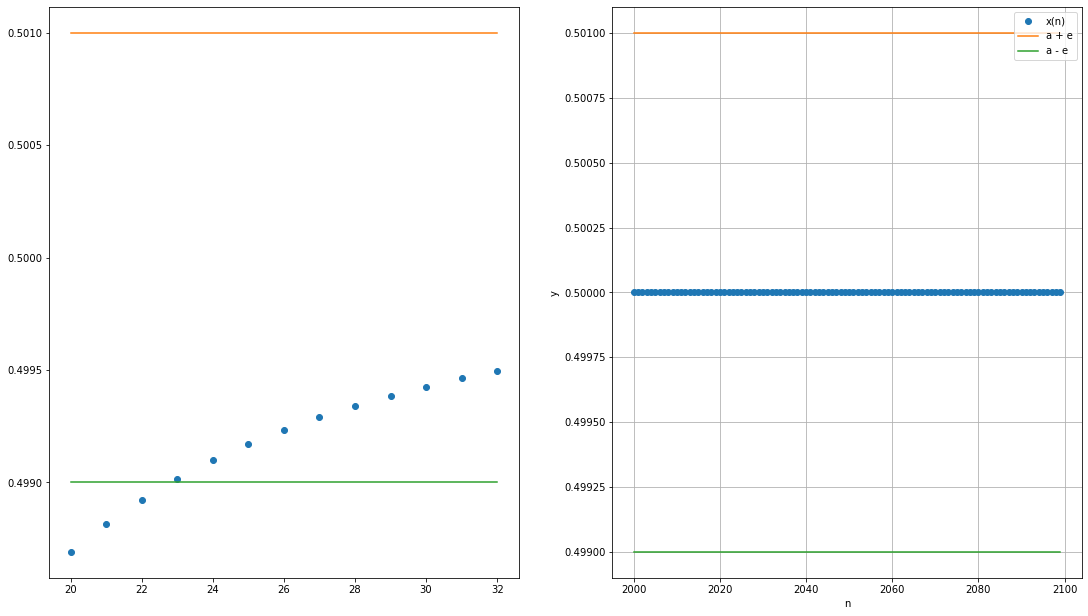

b)


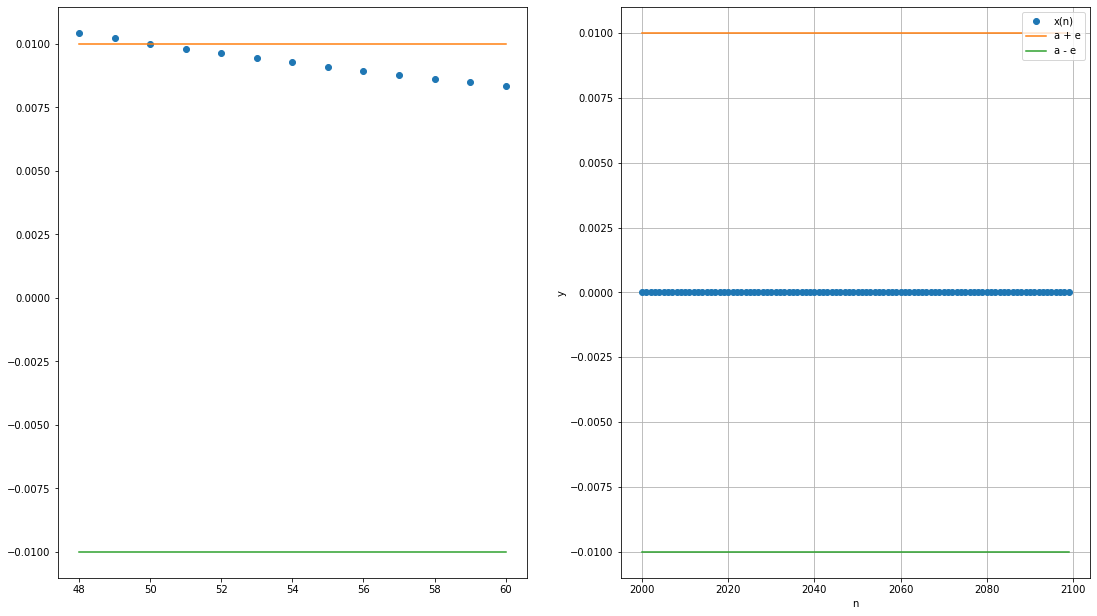

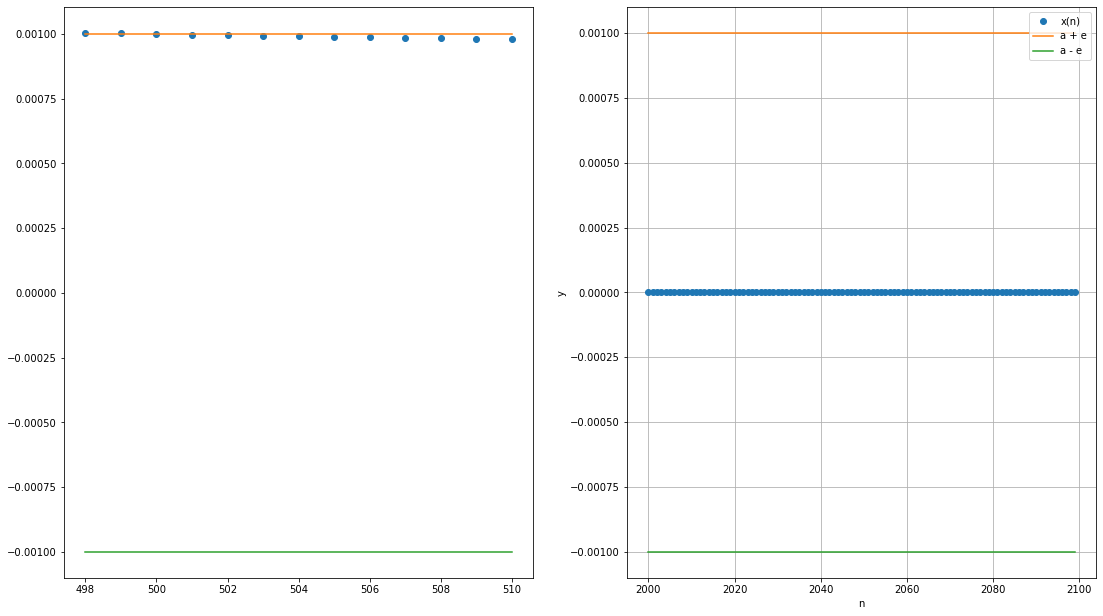

		a)	b)
n0(0.01)	7	50
n0(0.001)	22	500


In [102]:
from mpmath import mp
mp.dps = 15
#from sympy.abc import n
n = sp.Symbol('n', positive=True)
from sympy.calculus.util import minimum

def get_n(x, a, e):
    try:
        a = sp.solve_univariate_inequality(sp.Abs(x - a) < e, n, relational=False)
        b = sp.solve_univariate_inequality(n > 0.5, n, relational=False)
        c = sp.Intersection(a, b)
        return np.floor( c.inf )
    except:
        print(f"Ошибка при расчете N0 для\n{sp.pprint(x)}")
        return 0

def get_limit(x, lim):
    return sp.limit(x, n, lim)

def func(x, e):
    a = get_limit(x, sp.oo)
    n0 = get_n(x, a, e)
    
    _n = np.arange(n0 - 2, n0 + 10 + 1, 1)
    lam_x = sp.lambdify(n, x, modules=['numpy'], dummify =True)
    y_vals = lam_x(_n)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    n_line, = ax1.plot(_n, y_vals, 'o')
    n_line.set_label("x(n)")
    
    ae_line, = ax1.plot(_n, [a + e] * len(_n))
    ae_line.set_label("a + e")
    
    a_e_line, = ax1.plot(_n, [a - e] * len(_n))
    a_e_line.set_label("a - e")
    
    #ax2.set_ylim(np.float32(a) + np.float32(e)*1.5, np.float32(a) - np.float32(e)*1.5)
    _n = np.arange(2000, 2100, 1)
    lam_x = sp.lambdify(n, x, modules=['numpy'], dummify =True)
    #y_vals = lam_x(_n)
    y_vals = [a] * len(_n)
    
    n_line, = ax2.plot(_n, y_vals, 'o')

    n_line.set_label("x(n)")
    
    ae_line, = ax2.plot(_n, [a + e] * len(_n))
    ae_line.set_label("a + e")
    
    a_e_line, = ax2.plot(_n, [a - e] * len(_n))
    a_e_line.set_label("a - e")
    
    plt.grid()
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('y')
    
    plt.show()
    return n0

print("a)")
xn = (n**3 - 1) / (2*n**3 + 2*n)
na1 = func(xn, 0.01)
na2 = func(xn, 0.001)

print("b)")
xn = (n**3 + 3*n) / (2*n**4 + 1)
nb1 = func(xn, 0.01)
nb2 = func(xn, 0.001)

print(f"\t\ta)\tb)\nn0(0.01)\t{na1}\t{nb1}\nn0(0.001)\t{na2}\t{nb2}")

### Упражнение С1

In [11]:
a = sp.solve_univariate_inequality(x**3 - 3*x + 1 > 0, x, relational=False)

sp.pprint(a)
sp.pprint(sp.N(a, 5))

NotImplementedError: 
The inequality, x**3 - 3*x + 1 > 0, cannot be solved using
solve_univariate_inequality.

### Упражнение С2

a)


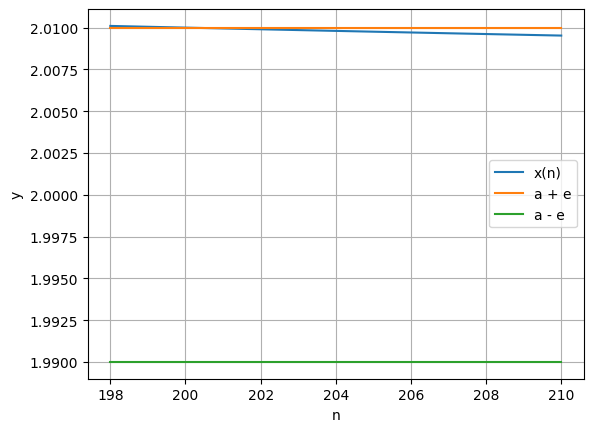

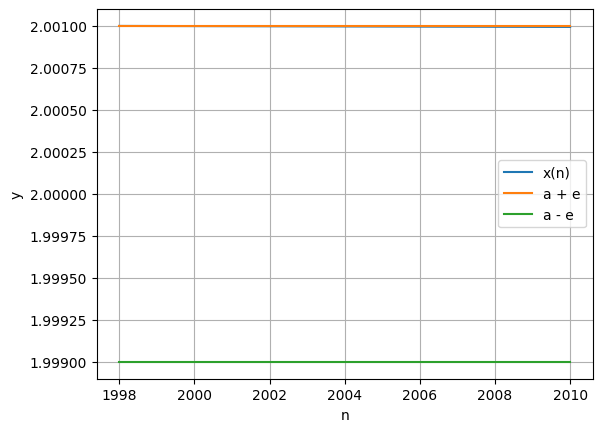

б)
        -0.5           0.5
⎛ 5    ⎞     ⎛   5    ⎞   
⎝n  - 5⎠    ⋅⎝2⋅n  + 3⎠   
Ошибка при расчете N0 для
None


<lambdifygenerated-31>:2: RuntimeWarning: invalid value encountered in power
  return (n**5 - 5)**(-0.5)*sqrt(2*n**5 + 3)
<lambdifygenerated-31>:2: RuntimeWarning: invalid value encountered in sqrt
  return (n**5 - 5)**(-0.5)*sqrt(2*n**5 + 3)


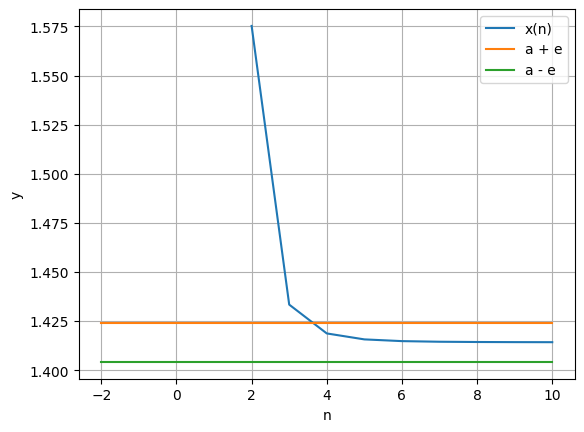

        -0.5           0.5
⎛ 5    ⎞     ⎛   5    ⎞   
⎝n  - 5⎠    ⋅⎝2⋅n  + 3⎠   
Ошибка при расчете N0 для
None


<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in power
  return (n**5 - 5)**(-0.5)*sqrt(2*n**5 + 3)
<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in sqrt
  return (n**5 - 5)**(-0.5)*sqrt(2*n**5 + 3)


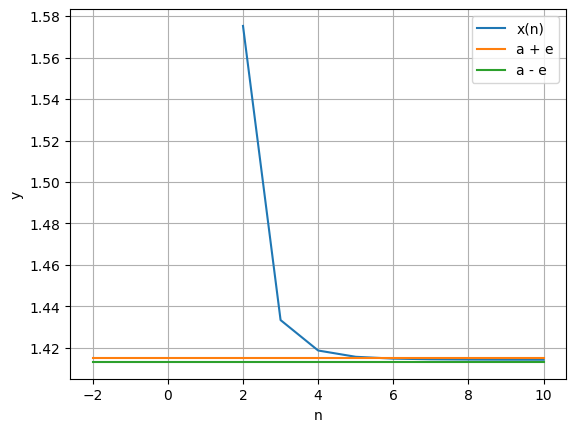

в)
           0.333333333333333            0.333333333333333
  ⎛ 3    2⎞                    ⎛ 3    2⎞                 
- ⎝n  - n ⎠                  + ⎝n  + n ⎠                 
Ошибка при расчете N0 для
None


<lambdifygenerated-33>:2: RuntimeWarning: invalid value encountered in power
  return -(n**3 - n**2)**0.333333333333333 + (n**3 + n**2)**0.333333333333333


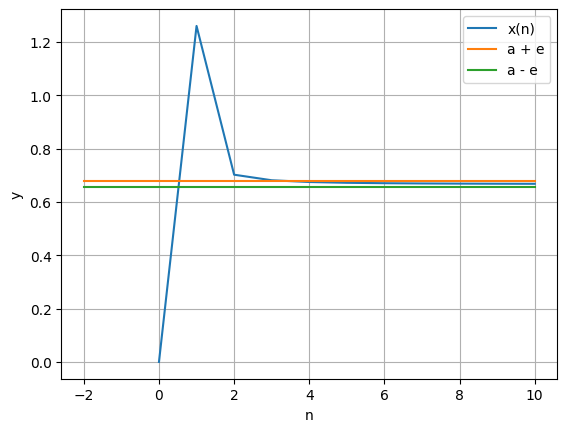

           0.333333333333333            0.333333333333333
  ⎛ 3    2⎞                    ⎛ 3    2⎞                 
- ⎝n  - n ⎠                  + ⎝n  + n ⎠                 
Ошибка при расчете N0 для
None


<lambdifygenerated-34>:2: RuntimeWarning: invalid value encountered in power
  return -(n**3 - n**2)**0.333333333333333 + (n**3 + n**2)**0.333333333333333


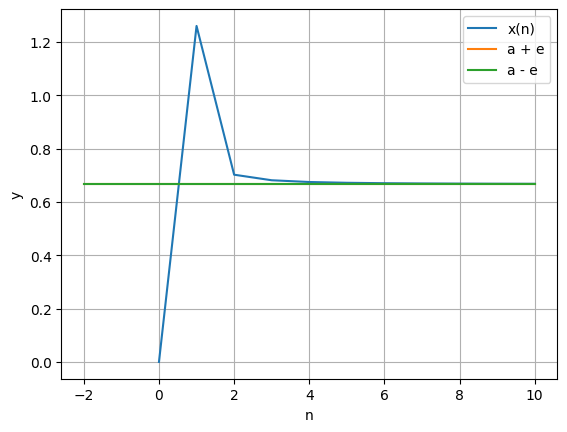

		a)	б)	в)
n0(0.01)	200	0	0
n0(0.001)	2000	0	0


In [18]:
print("a)")
xn = (2*n**5 + 2*n**4 + 3) / (n**5 - 5*n - 10000)
na1 = func(xn, 0.01)
na2 = func(xn, 0.001)

print("б)")
xn = (2*n**5 + 3)**(1/2) / (n**5 - 5)**(1/2)
nb1 = func(xn, 0.01)
nb2 = func(xn, 0.001)

print("в)")
xn = (n**3+n**2)**(1/3) - (n**3 - n**2)**(1/3)
nc1 = func(xn, 0.01)
nc2 = func(xn, 0.001)

print(f"\t\ta)\tб)\tв)\nn0(0.01)\t{na1}\t{nb1}\t{nc1}\nn0(0.001)\t{na2}\t{nb2}\t{nc2}")